TESIS RUINA
$\quad$
Mediante el algoritmo de Dassios y Zhao

In [1]:
import matplotlib.pyplot as plt
import time
from scipy.stats import describe
import numpy as np
import pandas as pd
import operator
from astropy.table import QTable, Table, Column
from astropy import units as u

In [2]:
def DCP_generator2(a,rho,delta,alpha,beta,lambda0,T,N_paths,N_jumps_max):
    N_T=np.zeros(N_paths)
    for j_path in range (0,N_paths):
        T_jump=np.zeros(N_jumps_max+1)
        T_jump[0]=0
        T_self=np.zeros(N_jumps_max+1)
        T_self[0]=0
        lambda_p=np.zeros(N_jumps_max+1)
        lambda_p[0]=lambda0
        lambda_n=np.zeros(N_jumps_max+1)
        lambda_n[0]=lambda0
        for i_jump in range(0,N_jumps_max):
            E=(-1/rho)*np.log(np.random.rand())
            d=1+((delta*np.log(np.random.rand()))/(lambda_p[i_jump]-a))
            if (d>0):
                S1=(-1/delta)*np.log(d)
                S2=(-1/a)*(np.log(np.random.rand()))
                S=min(S1,S2)
            elif (d<0):
                S=(-1/a)*(np.log(np.random.rand()))
            tau=min(S,E)
            T_jump[i_jump+1]=T_jump[i_jump]+tau
            if (tau==S):
                Y_size=(-1/beta)*np.log(np.random.rand())
                T_self[i_jump+1]=1
            elif (tau==E):
                Y_size=(-1/alpha)*np.log(np.random.rand())
                T_self[i_jump+1]=0
            lambda_n[i_jump+1]=a+(lambda_p[i_jump]-a)*np.exp(-delta*tau)
            lambda_p[i_jump+1]=lambda_n[i_jump+1]+Y_size
            if T_jump[i_jump+1]>T:
                N_T[j_path]=np.sum(T_self[0:i_jump])
                break
    return N_T,T_jump,T_self,lambda_p

In [15]:
a=0.0000000000000000000001
rho=0.5;delta=2.0;alpha=2.0;beta=1.5;N_jumps_max=10000;T=400;N_paths=10000;lambda0=1.0;gamma=1.0; c=1.0; x_0=10

In [16]:
start=time.time()
N_T,T_jump,T_self,lambda_p=DCP_generator2(a,rho,delta,alpha,beta,lambda0,T,N_paths,N_jumps_max)
end=time.time()
print(f"Runtime of the program is {end - start}")

In [17]:
max(N_T)

146.0

In [18]:
eta = delta-1/beta;
Mean_true = lambda0*(1-np.exp(-eta*T))/eta + rho/eta*(T-(1-np.exp(-eta*T))/eta)*1/alpha;
Mean_simulated = np.mean(N_T);
Mean_difference = Mean_simulated-Mean_true;
Error_p = (Mean_simulated-Mean_true)/Mean_true; 
SE_simulated = np.std(N_T)/np.sqrt(N_paths);
column1=['eta','Mean_true','Mean_simulated','Mean_difference','Error_p','SE_simulated']
column2=[eta,Mean_true,Mean_simulated,Mean_difference,Error_p,SE_simulated]
summary= Table([column1, column2], names=('Summary', 'Results'))
summary

Summary,Results
str15,float64
eta,1.3333333333333335
Mean_true,75.60937499999999
Mean_simulated,75.6081
Mean_difference,-0.0012749999999925876
Error_p,-1.6862988220608726e-05
SE_simulated,0.15691345206514323


In [19]:
a=0.0000000000000000000001;
rho=0.5;delta=3.0;alpha=2.0;beta=1.5;N_jumps_max=10000;T=400;N_paths=10000;lambda0=1.0;gamma=1.0; c=1.0; x_0=10

In [20]:
start=time.time()
N_T,T_jump,T_self,lambda_p=DCP_generator2(a,rho,delta,alpha,beta,lambda0,T,N_paths,N_jumps_max)
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 32.1739296913147


In [21]:
eta = delta-1/beta;
Mean_true = lambda0*(1-np.exp(-eta*T))/eta + rho/eta*(T-(1-np.exp(-eta*T))/eta)*1/alpha;
Mean_simulated = np.mean(N_T);
Mean_difference = Mean_simulated-Mean_true;
Error_p = (Mean_simulated-Mean_true)/Mean_true; 
SE_simulated = np.std(N_T)/np.sqrt(N_paths);
column1=['eta','Mean_true','Mean_simulated','Mean_difference','Error_p','SE_simulated']
column2=[eta,Mean_true,Mean_simulated,Mean_difference,Error_p,SE_simulated]
summary= Table([column1, column2], names=('Summary', 'Results'))
summary

Summary,Results
str15,float64
eta,2.3333333333333335
Mean_true,43.23979591836734
Mean_simulated,43.0661
Mean_difference,-0.17369591836734344
Error_p,-0.004017038348082516
SE_simulated,0.09660627867276536


In [22]:
a=0.0000000000000000000001;
rho=0.5;delta=4.0;alpha=2.0;beta=1.5;N_jumps_max=10000;T=400;N_paths=10000;lambda0=1.0;gamma=1.0; c=1.0; x_0=10

In [23]:
start=time.time()
N_T,T_jump,T_self,lambda_p=DCP_generator2(a,rho,delta,alpha,beta,lambda0,T,N_paths,N_jumps_max)
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 30.63076162338257


In [24]:
eta = delta-1/beta;
Mean_true = lambda0*(1-np.exp(-eta*T))/eta + rho/eta*(T-(1-np.exp(-eta*T))/eta)*1/alpha;
Mean_simulated = np.mean(N_T);
Mean_difference = Mean_simulated-Mean_true;
Error_p = (Mean_simulated-Mean_true)/Mean_true; 
SE_simulated = np.std(N_T)/np.sqrt(N_paths);
column1=['eta','Mean_true','Mean_simulated','Mean_difference','Error_p','SE_simulated']
column2=[eta,Mean_true,Mean_simulated,Mean_difference,Error_p,SE_simulated]
summary= Table([column1, column2], names=('Summary', 'Results'))
summary

Summary,Results
str15,float64
eta,3.3333333333333335
Mean_true,30.2775
Mean_simulated,30.0841
Mean_difference,-0.19340000000000046
Error_p,-0.006387581537445313
SE_simulated,0.07356672290512879


In [25]:
a=0.0000000000000000000001;
rho=0.5;delta=5.0;alpha=2.0;beta=1.5;N_jumps_max=10000;T=400;N_paths=10000;lambda0=1.0;gamma=1.0; c=1.0; x_0=10

In [26]:
start=time.time()
N_T,T_jump,T_self,lambda_p=DCP_generator2(a,rho,delta,alpha,beta,lambda0,T,N_paths,N_jumps_max)
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 29.571756839752197


In [27]:
eta = delta-1/beta;
Mean_true = lambda0*(1-np.exp(-eta*T))/eta + rho/eta*(T-(1-np.exp(-eta*T))/eta)*1/alpha;
Mean_simulated = np.mean(N_T);
Mean_difference = Mean_simulated-Mean_true;
Error_p = (Mean_simulated-Mean_true)/Mean_true; 
SE_simulated = np.std(N_T)/np.sqrt(N_paths);
column1=['eta','Mean_true','Mean_simulated','Mean_difference','Error_p','SE_simulated']
column2=[eta,Mean_true,Mean_simulated,Mean_difference,Error_p,SE_simulated]
summary= Table([column1, column2], names=('Summary', 'Results'))
summary

Summary,Results
str15,float64
eta,4.333333333333333
Mean_true,23.294378698224854
Mean_simulated,23.2697
Mean_difference,-0.02467869822485369
Error_p,-0.001059427192481177
SE_simulated,0.06101324602903865


In [28]:
N_T

array([24., 21., 27., ..., 13., 29., 23.])

$\quad$

Simulación del número de saltos e intensidades para distintos delta. 

In [2]:
def simulation2(a,rho,delta,alpha,beta,lambda0,T):
    T0=0
    Nt=[]
    Nt.append(0)
    E=(-1/rho)*(np.log(np.random.uniform(0,1)))
    d1=1+((delta*np.log(np.random.uniform(0,1)))/lambda0-a)
    lambdat=[]
    Ti=[]
    size=[]
    if d1>0:
        S1=(-np.log(d1))/delta
        S2=(-np.log(np.random.uniform(0,1)))/a
        S= min(S1,S2)
    else:
        S2=(-np.log(np.random.uniform(0,1)))/a
        S=S2
    Ti.append(T0+min(S,E))
    lambdamenos=a+(lambda0-a)*np.exp(-delta*(Ti[0]-T0))
    if S<E:
        SJ=np.random.exponential(scale=1/beta)
        lambdat.append(lambdamenos+SJ)
        size.append(SJ)
        N=1
    else:
        EJ=np.random.exponential(scale=1/alpha)
        lambdat.append(lambdamenos+EJ)
        size.append(EJ)
        N=0
    Nt[0]=N
    i=1
    Tx=Ti[-1]
    while Tx<T:
        E=(-1/rho)*(np.log(np.random.uniform(0,1)))
        d1=1+((delta*np.log(np.random.uniform(0,1)))/lambdat[i-1]-a)
        if d1>0:
            S1=(-np.log(d1))/delta
            S2=(-np.log(np.random.uniform(0,1)))/a
            S= min(S1,S2)
        else:
            S2=(-np.log(np.random.uniform(0,1)))/a
            S=S2
        Tx=Ti[i-1]+min(S,E)
        if Tx>T:
            break
        Ti.append(Tx)
        lambdamenos=a+(lambdat[i-1]-a)*np.exp(-delta*(Ti[i]-Ti[i-1]))
        if S<E:
            SJ=np.random.exponential(scale=1/beta)
            lambdat.append(lambdamenos+SJ)
            size.append(SJ)
            N=1+N
        else:
            EJ=np.random.exponential(scale=1/alpha)
            lambdat.append(lambdamenos+EJ)
            size.append(EJ)
            N=0+N
        Nt.append(N)
        i=i+1
        if i==1000000:
            break
    return Ti,Nt,N,lambdat,size

Para $\delta=2.0$

In [87]:
a=0.0000000000000000000001
rho=0.5;delta=2.0;alpha=2.0;beta=1.5;T=400;lambda0=1.0

In [88]:
start=time.time()
Ti,Nt,N,lambdat,size=simulation2(a,rho,delta,alpha,beta,lambda0,T)
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.013763666152954102


In [89]:
#Conteo del número de saltos internos
i=0
Nt_final=[]
while i <(len(Nt)):
    
    if i==0:
        intr=Nt[0]
        
    else:
        intr=Nt[i]-Nt[i-1]
    Nt_final.append(intr)    
    i=i+1
    if i ==10000000:
        break
        
Ti_S = list(map(operator.mul, Ti, Nt_final))

No handles with labels found to put in legend.


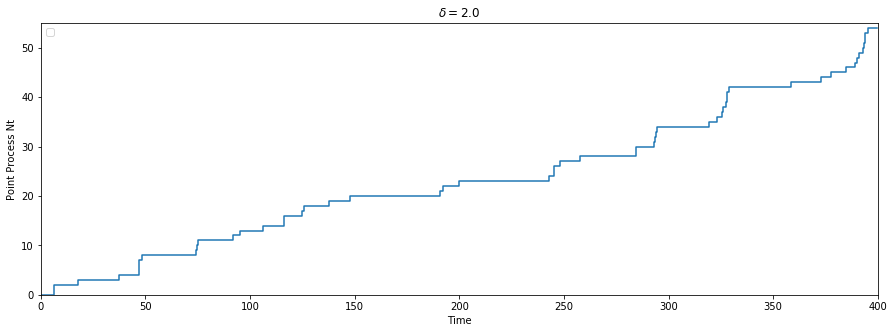

In [90]:
plt.figure(figsize=(15,5))
#plt.scatter(Ti,Nt,label='Jumps self and externally',color='red')
plt.xlim(0,T)
plt.ylim(0,np.max(Nt)+1)
plt.step(Ti,Nt,where='post')
plt.title(r'$\delta=2.0$')
plt.xlabel('Time')
plt.ylabel('Point Process Nt')
plt.legend()
plt.savefig("delta2_conteo.jpg", bbox_inches='tight')

In [91]:
new_Ti = np.round(Ti, 4)
new_Ti
tiempos = np.round(np.linspace(0,400,4000000),4)

new_lambda = np.zeros(len(tiempos))

ix = np.isin(tiempos,new_Ti)

new_lambda[ix] = lambdat

j=0
for i in range(len(tiempos)):
    if (j == 0):
        new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i])
        if (new_lambda[i] != 0):
            j += 1
    else:
        if (new_lambda[i] == 0):
            new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i]) + np.sum(size[:j-1]*np.exp(-delta*(tiempos[i] - new_Ti[:j-1])))
        else:
            j += 1

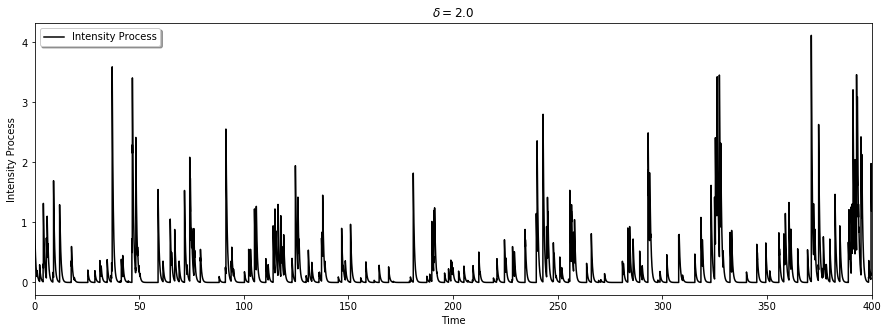

In [92]:
plt.figure(figsize=(15,5))
plt.plot(tiempos, new_lambda,color='black',label='Intensity Process')
#plt.scatter(new_Ti, lambdat,marker='D',color='red',label='Jump')
plt.title(r'$\delta=2.0$')
plt.xlim(0,T)
plt.legend(('Intensity Process','Jumps Size'), loc='upper left', shadow=True)
plt.xlabel('Time')
plt.ylabel('Intensity Process')
plt.savefig("delta2_int.jpg", bbox_inches='tight')

Para $\delta=3.0$

In [93]:
a=0.0000000000000000000001
rho=0.5;delta=3.0;alpha=2.0;beta=1.5;T=400;lambda0=1.0

In [94]:
start=time.time()
Ti,Nt,N,lambdat,size=simulation2(a,rho,delta,alpha,beta,lambda0,T)
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.015983104705810547


In [95]:
#Conteo del número de saltos internos
i=0
Nt_final=[]
while i <(len(Nt)):
    
    if i==0:
        intr=Nt[0]
        
    else:
        intr=Nt[i]-Nt[i-1]
    Nt_final.append(intr)    
    i=i+1
    if i ==10000000:
        break
        
Ti_S = list(map(operator.mul, Ti, Nt_final))

No handles with labels found to put in legend.


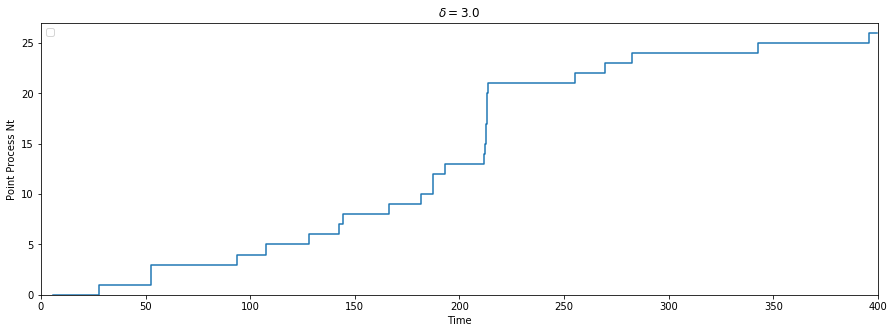

In [96]:
plt.figure(figsize=(15,5))
#plt.scatter(Ti,Nt,label='Jumps self and externally',color='red')
plt.xlim(0,T)
plt.ylim(0,np.max(Nt)+1)
plt.step(Ti,Nt,where='post')
plt.title(r'$\delta=3.0$')
plt.xlabel('Time')
plt.ylabel('Point Process Nt')
plt.legend()
plt.savefig("delta3_conteo.jpg", bbox_inches='tight')

In [97]:
start=time.time()
new_Ti = np.round(Ti, 4)
new_Ti
tiempos = np.round(np.linspace(0,400,4000000),4)

new_lambda = np.zeros(len(tiempos))

ix = np.isin(tiempos,new_Ti)

new_lambda[ix] = lambdat

j=0
for i in range(len(tiempos)):
    if (j == 0):
        new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i])
        if (new_lambda[i] != 0):
            j += 1
    else:
        if (new_lambda[i] == 0):
            new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i]) + np.sum(size[:j-1]*np.exp(-delta*(tiempos[i] - new_Ti[:j-1])))
        else:
            j += 1
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 146.03573417663574


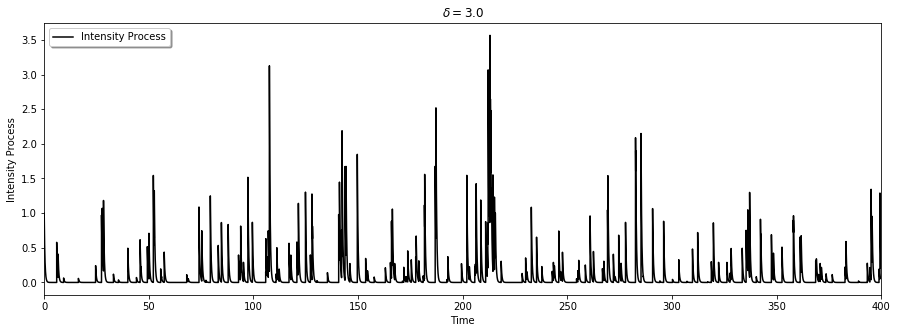

In [98]:
plt.figure(figsize=(15,5))
plt.plot(tiempos, new_lambda,color='black',label='Intensity Process')
#plt.scatter(new_Ti, lambdat,marker='D',color='red',label='Jump')
plt.title(r'$\delta=3.0$')
plt.xlim(0,T)
plt.legend(('Intensity Process','Jumps Size'), loc='upper left', shadow=True)
plt.xlabel('Time')
plt.ylabel('Intensity Process')
plt.savefig("delta3_int.jpg", bbox_inches='tight')

$\quad$

Para $\delta=4.0$

In [3]:
a=0.0000000000000000000001
rho=0.5;delta=4.0;alpha=2.0;beta=1.5;T=400;lambda0=1.0

In [6]:
start=time.time()
Ti,Nt,N,lambdat,size=simulation2(a,rho,delta,alpha,beta,lambda0,T)
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.006000518798828125


No handles with labels found to put in legend.


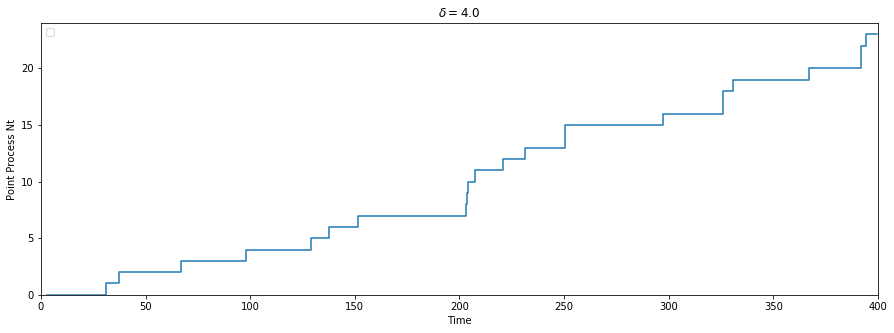

In [7]:
plt.figure(figsize=(15,5))
#plt.scatter(Ti,Nt,label='Jumps self and externally',color='red')
plt.xlim(0,T)
plt.ylim(0,np.max(Nt)+1)
plt.step(Ti,Nt,where='post')
plt.title(r'$\delta=4.0$')
plt.xlabel('Time')
plt.ylabel('Point Process Nt')
plt.legend()
plt.savefig("delta4_conteo.jpg", bbox_inches='tight')

In [8]:
start=time.time()
new_Ti = np.round(Ti, 4)
new_Ti
tiempos = np.round(np.linspace(0,400,4000000),4)

new_lambda = np.zeros(len(tiempos))

ix = np.isin(tiempos,new_Ti)

new_lambda[ix] = lambdat

j=0
for i in range(len(tiempos)):
    if (j == 0):
        new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i])
        if (new_lambda[i] != 0):
            j += 1
    else:
        if (new_lambda[i] == 0):
            new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i]) + np.sum(size[:j-1]*np.exp(-delta*(tiempos[i] - new_Ti[:j-1])))
        else:
            j += 1
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 92.38019633293152


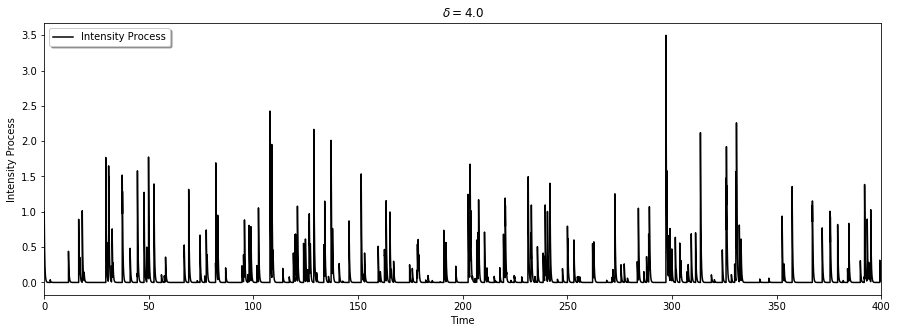

In [9]:
plt.figure(figsize=(15,5))
plt.plot(tiempos, new_lambda,color='black',label='Intensity Process')
#plt.scatter(new_Ti, lambdat,marker='D',color='red',label='Jump')
plt.title(r'$\delta=4.0$')
plt.xlim(0,T)
plt.legend(('Intensity Process','Jumps Size'), loc='upper left', shadow=True)
plt.xlabel('Time')
plt.ylabel('Intensity Process')
plt.savefig("delta4_int.jpg", bbox_inches='tight')

$\quad$

Para $\delta=5.0$

In [104]:
a=0.0000000000000000000001
rho=0.5;delta=5.0;alpha=2.0;beta=1.5;T=400;lambda0=1.0

In [105]:
start=time.time()
Ti,Nt,N,lambdat,size=simulation2(a,rho,delta,alpha,beta,lambda0,T)
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.015992164611816406


No handles with labels found to put in legend.


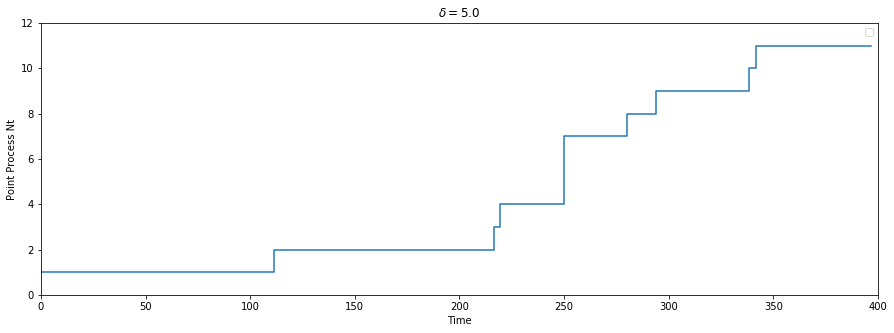

In [106]:
plt.figure(figsize=(15,5))
#plt.scatter(Ti,Nt,label='Jumps self and externally',color='red')
plt.xlim(0,T)
plt.ylim(0,np.max(Nt)+1)
plt.step(Ti,Nt,where='post')
plt.title(r'$\delta=5.0$')
plt.xlabel('Time')
plt.ylabel('Point Process Nt')
plt.legend()
plt.savefig("delta5_conteo.jpg", bbox_inches='tight')

In [107]:
start=time.time()
new_Ti = np.round(Ti, 4)
new_Ti
tiempos = np.round(np.linspace(0,400,4000000),4)

new_lambda = np.zeros(len(tiempos))

ix = np.isin(tiempos,new_Ti)

new_lambda[ix] = lambdat

j=0
for i in range(len(tiempos)):
    if (j == 0):
        new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i])
        if (new_lambda[i] != 0):
            j += 1
    else:
        if (new_lambda[i] == 0):
            new_lambda[i] = a+(lambda0-a)*np.exp(-delta*tiempos[i]) + np.sum(size[:j-1]*np.exp(-delta*(tiempos[i] - new_Ti[:j-1])))
        else:
            j += 1
end=time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 144.78815412521362


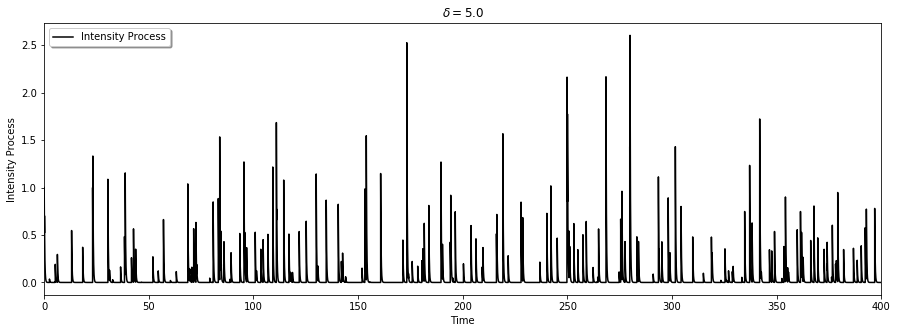

In [108]:
plt.figure(figsize=(15,5))
plt.plot(tiempos, new_lambda,color='black',label='Intensity Process')
#plt.scatter(new_Ti, lambdat,marker='D',color='red',label='Jump')
plt.title(r'$\delta=5.0$')
plt.xlim(0,T)
plt.legend(('Intensity Process','Jumps Size'), loc='upper left', shadow=True)
plt.xlabel('Time')
plt.ylabel('Intensity Process')
plt.savefig("delta5_int.jpg", bbox_inches='tight')